In [1]:
# importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
#importing dataset
wine_dataset=pd.read_csv(r'C:\Users\khang\Downloads\winequality-red.csv')

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_dataset.shape

(1599, 12)

In [6]:
# checking for the missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# data visualization 


In [8]:
wine_dataset.shape

(1599, 12)

In [9]:
# number of values for each quality

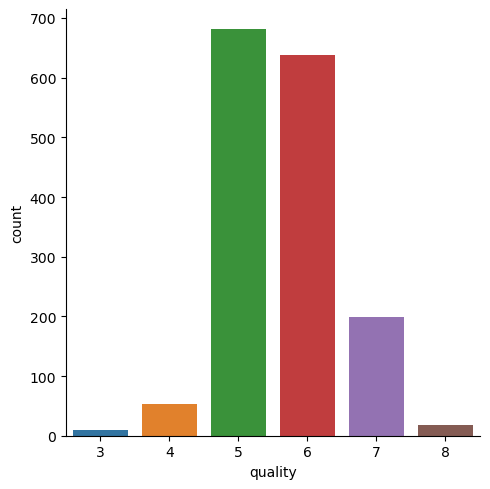

In [10]:
sns.catplot(x='quality',data=wine_dataset,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

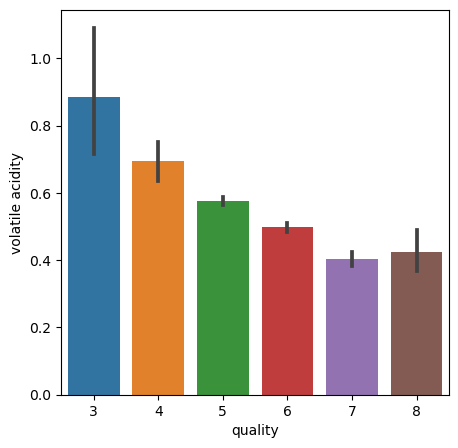

In [11]:
# volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

In [12]:
# Citric acid vs Quality

<Axes: xlabel='quality', ylabel='citric acid'>

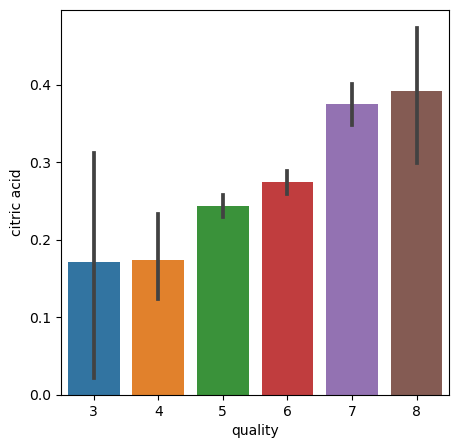

In [13]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)

In [14]:
# correlation 1.Positive Correlation 2.Negative Correlation

In [15]:
correlation=wine_dataset.corr()

In [16]:
#constructing the heatmap to understand the correlation  between columns 

<Axes: >

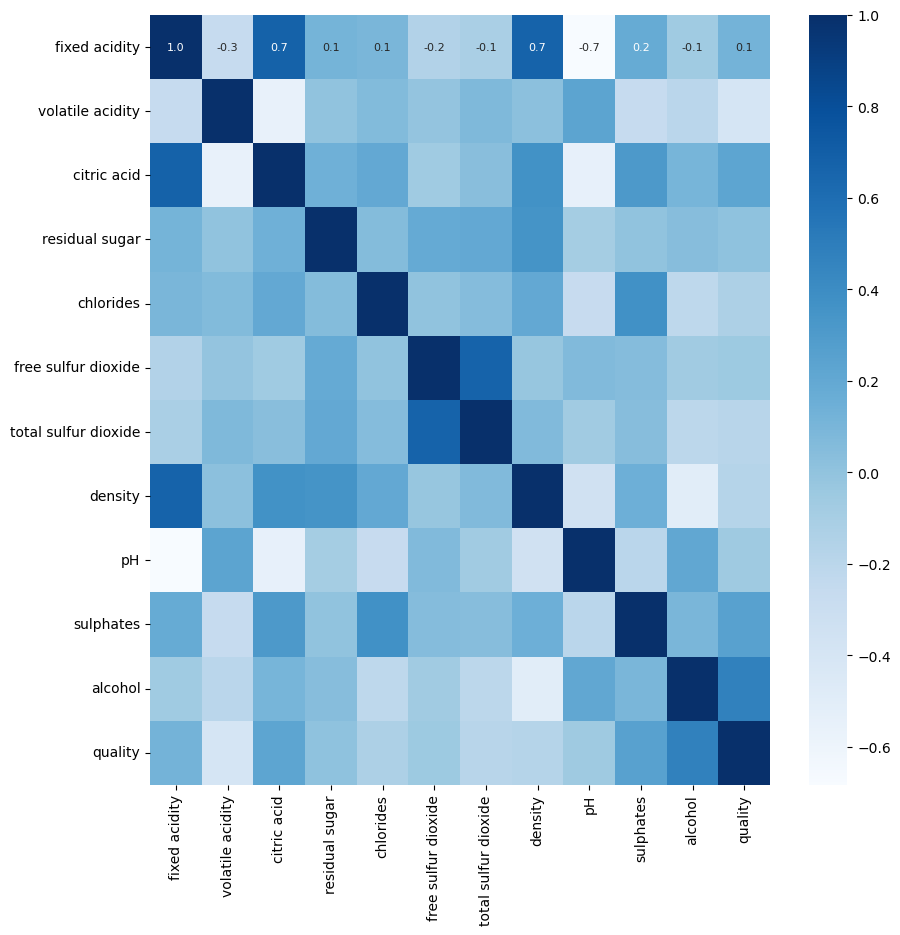

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=False,fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [18]:
# separate the data and the label

In [19]:
X=wine_dataset.drop('quality',axis=1)

In [20]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [21]:
#Label Binarization

In [22]:
Y=wine_dataset['quality'].apply(lambda y_value : 1 if y_value >= 7 else 0)

In [23]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [24]:
# Train & Split

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [26]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


In [27]:
# Model Training: Random forest classifier

In [28]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [29]:
# accuracy on test score

In [30]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [31]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.934375


In [32]:
# Building a predictive system

In [33]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#changing the input data into a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the data as we are predicting the label for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

[1]
Good Quality Wine


C:\Users\khang\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
